# The Sparks Foundation(TSF)

Data Science & Business Analytics Internship in GRIP 
Task- 1 Prediction using unsupervised ML
By- Sajal Singh

# Importing necessary Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Data

In [8]:
data_link="http://bit.ly/w-data"
df=pd.read_csv(data_link)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Exploring the Data

In [11]:
df.shape

(25, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


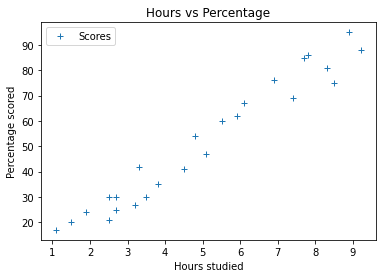

In [16]:
df.plot(x="Hours",y="Scores",style="+")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show()

# Processing the Data

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dividing data into attributes and labels

In [18]:
x=df.drop(["Scores"],axis=1)
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [20]:
y=df.Scores
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

# Splitting data into test set and train set

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Training the algorithm using Linear Regression


In [22]:
Linear_reg=LinearRegression()
Linear_reg.fit(x_train,y_train)

LinearRegression()

In [23]:
print(Linear_reg.coef_)
print(Linear_reg.intercept_)

[9.91065648]
2.018160041434683


In [24]:
line=Linear_reg.coef_*x+Linear_reg.intercept_

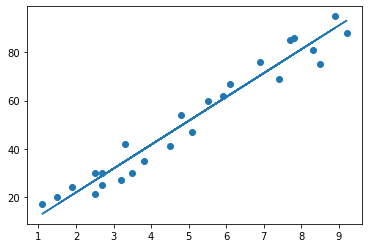

In [25]:
plt.scatter(x,y)
plt.plot(x,line)
plt.show()


# Making Predictions

In [26]:
pred_test=Linear_reg.predict(x_test)
pred_test

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Comparing it with the actual values

In [27]:
data=pd.DataFrame({"Actual":y_test,"Predicted":pred_test})
data

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# Q.) What will be the predicted score if a student studied for 9.25 hrs in a day?

In [28]:
y_pred=Linear_reg.predict([[9.25]])
print("Predicted score:",y_pred[0])

Predicted score: 93.69173248737538


# Evaluating the model

In [29]:
from sklearn import metrics
print("Mean absolute error:",metrics.mean_absolute_error(y_test,pred_test))

Mean absolute error: 4.183859899002975
